<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Tarea Módulo 03

### Instrucciones

* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_homework_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__: Cristóbal Montecino

__Rol__: 201710019-2

**Indicaciones**: Para el **Ejercicio 1** puedes utilizar tanto `matplotlib` como `altair` según te parezca más conveniente, en ambos casos cada gráfico debe tener elementos mínimos como:
- Título
- Nombre de los ejes en formato _amigable_, por ejemplo, si la columna del dataframe en cuestión tiene por nombre `cost_of_living_index` se espera que el eje del gráfico tenga por nombre `Índice de Costo de Vida`.
- Colores adecuados al tipo de datos.
- Un tamaño adecuado para ver con facilidad en una pantalla con resolución HD o FullHD.

Para el **Ejercicio 2** es obligación utilizar `altair`.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import ipywidgets as widgets

from vega_datasets import data
from ipywidgets import interactive, interact

pd.set_option('display.max_columns', 999)
alt.themes.enable('opaque')

%matplotlib inline

## 1. Índices de Costos de Vida

Estos índices están ajustados a la Ciudad de Nueva York (NYC). Lo que significa que para la Ciudad de Nueva York, cada índice debería marcar 100(%). Si otra ciudad tiene, por ejemplo, un índice de alquiler de 120, significa que en esa ciudad se paga de media por el alquiler un 20% más que en Nueva York. Si una ciudad tiene un índice de alquiler de 70, significa que en esa ciudad los alquileres son de media un 30% más baratos que en Nueva York.

* El Índice de Costo de Vida (Sin Alquiler) es un indicador relativo de los precios de bienes de consumo, incluyendo comestibles, restaurantes, transporte y servicios. El Índice de Costo de Vida no incluye gastos de residencia como alquileres o hipotecas. Si una ciudad tiene un Costo de Vida de 120, significa que Numbeo estima que es un 20% más cara que Nueva York (sin contar alquiler).

* El Índice de Alquiler es una estimación de precios de alquiler de apartamentos de una ciudad comparada con Nueva York. Si el Índice de Alquiler es 80, Numbeo estima que el precio de los alquileres en esa ciudad es de media un 20% más barato que en Nueva York.

* El Índice de Comestibles es una estimación de los precios de la compra de una ciudad en comparación con Nueva York. Para calcular esta sección, Numbeo utiliza el peso de los artículos en la sección "Mercados" por cada ciudad.

* El Índice de Restaurantes es una comparación de precios de comidas y bebidas en bares y restaurantes en comparación con NY.

* El Índice de Costo de Vida más Alquiler es una estimación de precios de consumo incluyendo alquiler en comparación con la Ciudad de Nueva York.

* El Poder Adquisitivo Local muestra la capacidad adquisitiva relativa a la hora de comprar bienes y servicios en una ciudad determinada, con relación al salario medio de la ciudad. Si el poder adquisitivo doméstico es 40, significa que los habitantes de dicha ciudad con salario medio pueden permitirse comprar una media de 60% menos bienes y servicios que los habitantes de Nueva York con salario medio. 

Para más información sobre los pesos utilizados (fórmula completa) puedes visitar: [motivación y metodología](https://es.numbeo.com/coste-de-vida/motivaci%C3%B3n-y-metodolog%C3%ADa).

Para comenzar es necesario instalar el paquete `lxml` en tu entorno virtual de conda para poder descargar los datos. Basta con ejecutar 

`conda install -n mat281 lxml`

O cambia `mat281` por el ambiente que estés utilizando.

Se disponibiliza a continuación la carga de datos de un dataframe.

In [2]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
life_cost = (
    pd.concat(
        {
            year: (
                pd.read_html(f"https://www.numbeo.com/cost-of-living/rankings.jsp?title={year}")[2]
                .rename(columns=lambda x: x.lower().replace(" ", "_"))
                .assign(rank=lambda x: x.index + 1)
                .set_index("rank")
            ) for year in years
        }
    )
    .rename_axis(["year", "rank"])
    .reset_index()
)
life_cost.head()

year  rank                 city  cost_of_living_index  rent_index  \
0  2015     1    Hamilton, Bermuda                163.55      120.02   
1  2015     2  Geneva, Switzerland                145.18       81.46   
2  2015     3   Caracas, Venezuela                141.41       60.46   
3  2015     4  Zurich, Switzerland                141.06       66.39   
4  2015     5       Tromso, Norway                131.45       55.80   

   cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                          142.28           191.71                  132.91   
1                          114.05           161.14                  141.23   
2                          101.86           155.16                  122.27   
3                          104.57           148.56                  146.90   
4                           94.48           127.72                  137.08   

   local_purchasing_power_index  
0                         69.79  
1                        130.21  
2                          9.73  
3                        133.91  
4                        132.41

### Ejercicio 1.1 (5 pts)

Explique lo que se hizo en la celda anterior detalladamente.

Para cada año, consigue la 3ra tabla desde la pagina de numbeo. Se renombra las columnas para dejarla en el formato de guion bajo. Se crea la columna rank con el indice + 1 y se usa como nuevo indice, para que el indice empiece desde el 1. Luego se concatenan todos los dataframes de los años para tener un solo dataframe. Se cambia el nombre de la columna de indices a años y se reinician los indices para tener la columna de años.

### Ejercicio 1.2 (10 pts)

Genera un histograma del índice del costo de vida (sin alquiler) para cada año (es decir, 6 histogramas).

¿Qué conclusión puedes sacar de estos gráficos?

In [3]:
def make_grid_chart(charts, ncols, nrows):
    assert type(ncols) == int and type(nrows) == int
    assert len(charts) >= ncols * nrows
    assert len(charts) > 0
    
    final_chart = None

    i = 0
    for _ in range(nrows):
        row_chart = None
        for _ in range(ncols):
            chart = charts[i]
            i += 1

            if row_chart is None:
                row_chart = chart
            else:
                row_chart |= chart
        
        assert row_chart is not None
                
        if final_chart is None:
            final_chart = row_chart
        else:
            final_chart &= row_chart
    
    assert final_chart is not None
    return final_chart

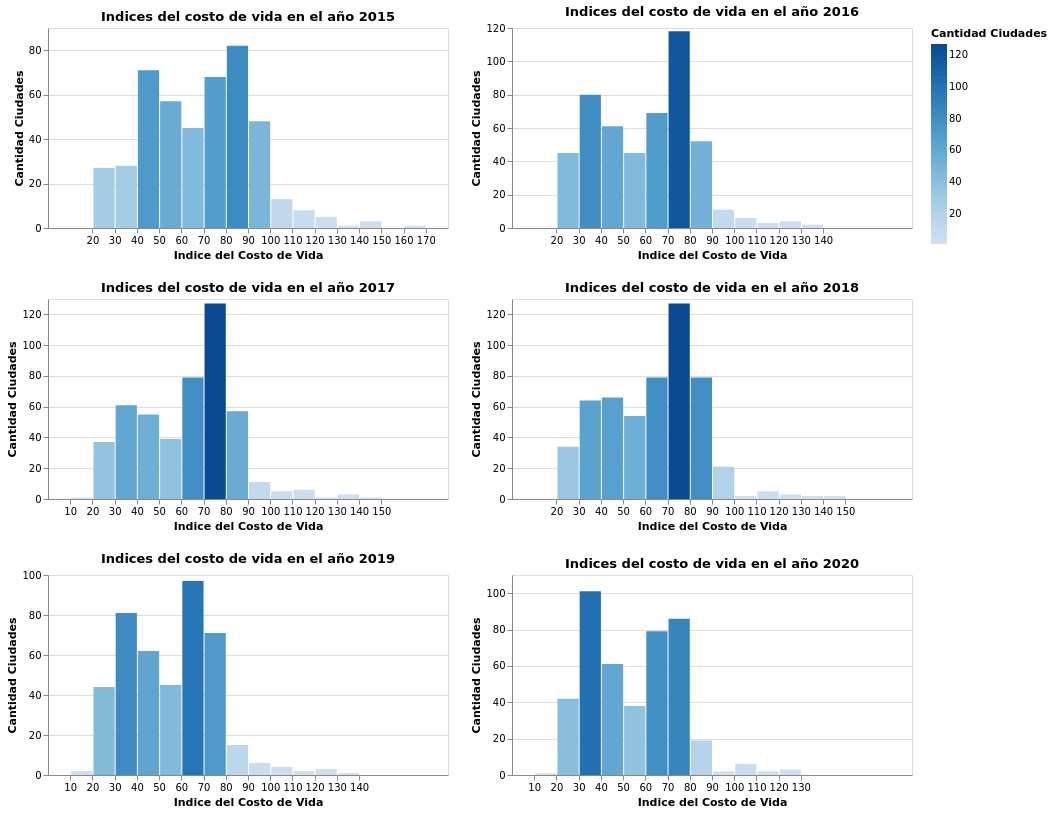

In [4]:
charts = [
    alt.Chart(df.reset_index(drop=True).reset_index())
       .mark_bar()
       .encode(
           alt.X('cost_of_living_index:Q',
                 title='Indice del Costo de Vida',
                 bin=alt.Bin(step=10),
                 scale=alt.Scale(domain=(0, 180))
                ),
           alt.Y('count():Q', title='Cantidad Ciudades'),
           color=alt.Color('count():Q', title='Cantidad Ciudades'),
       )
       .properties(
           title=f'Indices del costo de vida en el año {year}',
           height=200, width=400,
       )
    for year, df in life_cost.groupby('year')
]

assert len(charts) == 6

make_grid_chart(charts, 2, 3)

El índice de costo de vida disminuye con los años. Hay cada vez menos ciudades con índice mayor a 80.

### Ejercicio 1.3 ( pts)

Grafica el índice de restaurantes a través de los años para diez ciudades escogidas pseudo-aleatoriamente (variable `my_cities` de la celda siguiente) en un mismo gráfico. Recuerda escoger el tipo de gráfico adecuadamente.

¿Ves alguna relación? ¿Qué podrías decir del gráfico? ¿Por qué no graficar todas las ciudades en lugar de solo escoger algunas?

In [5]:
rol_seed = 201710019  # Escribe tu rol UTFSM sin número verificador
my_cities = life_cost["city"].drop_duplicates().sample(n=10, random_state=rol_seed).values

In [6]:
my_cities_df = life_cost.loc[life_cost.apply(lambda x: x['city'] in my_cities, axis=1)]

In [7]:
(
    alt.Chart(my_cities_df).mark_line().encode(
        alt.Color('city:N',  title='Ciudad'),
        alt.X('year:N', title='Año'),
        alt.Y('restaurant_price_index:Q', title='Indice Restaurantes'),
    ).properties(
        height=400,
        width=400,
        title=alt.TitleParams('Índice de restaurantes a través de los años', offset=20),
    )
)

El índice tiende a disminuir o mantenerse. Podemos verlo trazando una linea que conecta 2015 a 2020.

EL gráfico es fácil de interpretar.

Si se graficarán todas las ciudades, el gráfico seria incomprensible.

### Ejercicio 1.4

Genera un mapa de calor tal que:

- El eje horizontal corresponda a cada uno de los índices.
- El eje vertical corresponda a cada una de las ciudades de `my_cities`.
- El color y valor en cada celda sea el promedio de los indicadores.
    - El valor de la celda debe tener solo dos decimales.

In [8]:
redable_index_names = {
    'cost_of_living_index': 'Costo de Vida',
    'rent_index': 'Alquiler',
    'cost_of_living_plus_rent_index': 'Costo de Vida + Alquiler',
    'groceries_index': 'Comestibles',
    'restaurant_price_index': 'Restaurantes',
    'local_purchasing_power_index': 'Poder Adquisitivo Local'
}

In [9]:
indices_name = list(redable_index_names.keys())

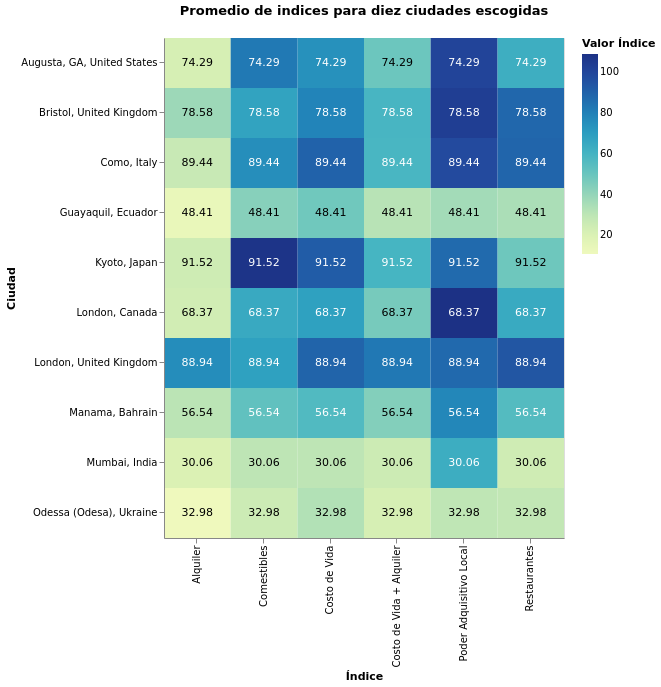

In [10]:
mean_df = my_cities_df.groupby('city').mean().reset_index()

df = pd.DataFrame().append([
    pd.DataFrame({
        'city': mean_df['city'],
        'index': redable_index_names[index],
        'value': mean_df[index],
        'value_text': mean_df['cost_of_living_index'].apply(lambda x: f'{x:.2f}')
    })
    for index in indices_name
])

heatmap = (
    alt.Chart(df)
       .mark_rect()
       .encode(
           alt.X('index:N', title='Índice'),
           alt.Y('city:N', title='Ciudad'),
           color=alt.Color('value', title='Valor Índice')
       )
       .properties(
           height=500,
           width=400,
       )
)

text = (
    alt.Chart(df)
       .mark_text()
       .encode(
           alt.X('index:N', title='Índice'),
           alt.Y('city:N', title='Ciudad'),
           alt.Text('value_text'),
           color=alt.condition(
               alt.datum.value > 50,
               alt.value('white'),
               alt.value('black')
           )
       )
       .properties(
           height=500,
           width=400,
       )
)

(heatmap + text).properties(
    title=alt.TitleParams('Promedio de indices para diez ciudades escogidas', offset=20)
)

### Ejercicio 1.5

Primero, agregar la columna `country` al dataframe `life_cost` a partir de la columna `city`. Luego, realizar un scatter plot donde:

- Datos correspondientes al año 2020.
- El eje horizontal corresponda a el Índice de Comestibles.
- El eje vertical corresponda a el Poder Adquisitivo Local.
- El color corresponda al país.
- Debe contener solo 20 países que son escogidos pseudo-aleatoriamente.
    - Para ellos deber agregar la columna `country` al dataframe `life_cost`.
    - Ejecutar la celda sub-siguiente para generar el _np.array_ `my_countries`.
- Se debe utilizar un esquema de color distint
o (_color scheme_ o _colormap_), puesto que hay 20 categorías. 
    - En `altair` utilizar el esquema `category20`. [Más información aquí](https://altair-viz.github.io/user_guide/customization.html?highlight=color%20map#color-schemes).
    - En `matplotlib` utilizar el esquema `tab20`. [Más información aquí](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).    
- En caso que los puntos del scatter plot se vean muy pequeños en relación al gráfico debes aumentar su tamaño.

In [11]:
life_cost['country'] = life_cost['city'].apply(lambda x: x.split(', ')[-1])

In [12]:
life_cost.head()

year  rank                 city  cost_of_living_index  rent_index  \
0  2015     1    Hamilton, Bermuda                163.55      120.02   
1  2015     2  Geneva, Switzerland                145.18       81.46   
2  2015     3   Caracas, Venezuela                141.41       60.46   
3  2015     4  Zurich, Switzerland                141.06       66.39   
4  2015     5       Tromso, Norway                131.45       55.80   

   cost_of_living_plus_rent_index  groceries_index  restaurant_price_index  \
0                          142.28           191.71                  132.91   
1                          114.05           161.14                  141.23   
2                          101.86           155.16                  122.27   
3                          104.57           148.56                  146.90   
4                           94.48           127.72                  137.08   

   local_purchasing_power_index      country  
0                         69.79      Bermuda  
1                        130.21  Switzerland  
2                          9.73    Venezuela  
3                        133.91  Switzerland  
4                        132.41       Norway

In [13]:
my_countries = life_cost.query("year == 2020")["country"].drop_duplicates().sample(n=20, random_state=rol_seed).values

In [14]:
(
    alt.Chart(life_cost[life_cost['country'].apply(lambda x: x in my_countries)])
       .mark_circle(opacity=0.7, size=100)
       .encode(
           alt.X('groceries_index:Q', title='Índice de Comestibles'),
           alt.Y('local_purchasing_power_index:Q', title='Poder Adquisitivo Local'),
           color=alt.Color('country:N', title='País', scale=alt.Scale(scheme='category20')),
       )
       .properties(
           height=400,
           width=600,
           title=alt.TitleParams('Poder Adquisitivo Local vs Índice de Comestibles', offset=15)
       )
)

¿Qué comentarios puedes entregar al comparar los países seleccionados?

Hay un gran concentración de países hacia el lado inferior izquierda del gráfico. Sin embargo, en general, es bastante homogeneo.

### Ejercicio 1.6

El siguiente ejercicio necesita de un conjunto de datos adicional, que relacione el país con el continente. A continuación se disponibiliza el dataframe `countries` con las columnas `country` y `continent`.

Agrega la columna `continent` al dataframe `life_cost` realizando un _merge_ con `countries`.

In [15]:
rename_countries_dict = {
    "Czechia": "Czech Republic",
    "Bosnia and Herzegovina": "Bosnia And Herzegovina",
    "Kosovo": "Kosovo (Disputed Territory)",
    "North Macedonia": "Macedonia",
    "Trinidad and Tobago": "Trinidad And Tobago"
}

countries = (
    pd.read_html("http://www.geonames.org/countries/", keep_default_na=False)[1]
    .rename(columns=lambda x: x.lower())
    .assign(country=lambda x: x["country"].replace(rename_countries_dict))
    .loc[:, ["country", "continent"]]
)
countries.head()

country continent
0               Andorra        EU
1  United Arab Emirates        AS
2           Afghanistan        AS
3   Antigua and Barbuda        NA
4              Anguilla        NA

In [16]:
life_cost = life_cost.merge(countries)

A continuación genera un gráfico que posea 36 subgráficos, estos se generan realizando todas las permutaciones (con repetición) de dos índices. 

Cada sub-gráfico:
- Debe corresponder solo al año 2020.
- Debe ser un scatter plot.
- Los ejes horizontal y vertical corresponden al par de índices de la permutación
- El color de cada punto se corresponde al continente.
- La opacidad de cada punto debe ser `0.3`.

In [17]:
charts = [
    alt.Chart(life_cost.query('year == 2020'))
       .mark_circle(opacity=0.3, size=50)
       .encode(
           alt.X(x, title=f'Índice de {redable_index_names[x]}'),
           alt.Y(y, title=f'Índice de {redable_index_names[y]}'),
           alt.Color('continent:N')
       )
       .properties(
           height=300,
           width=300
       )
    for x in indices_name
    for y in indices_name
]

make_grid_chart(charts, len(indices_name), len(indices_name)).properties(
    title=alt.TitleParams('Permutaciones de dos indices', anchor='middle', offset=10)
)

## 2. Películas

Este ejercicio utilizará el dataset de películas que viene pre-cargado en `vega_datasets`. Es intereasnte pues posee columnas de distintos tipos y una cantidad relativamente decente de registros.

In [18]:
movies_raw = data.movies()
movies_raw.head()

Title   US_Gross  Worldwide_Gross  US_DVD_Sales  \
0              The Land Girls   146083.0         146083.0           NaN   
1      First Love, Last Rites    10876.0          10876.0           NaN   
2  I Married a Strange Person   203134.0         203134.0           NaN   
3        Let's Talk About Sex   373615.0         373615.0           NaN   
4                        Slam  1009819.0        1087521.0           NaN   

   Production_Budget Release_Date MPAA_Rating  Running_Time_min Distributor  \
0          8000000.0  Jun 12 1998           R               NaN    Gramercy   
1           300000.0  Aug 07 1998           R               NaN      Strand   
2           250000.0  Aug 28 1998        None               NaN   Lionsgate   
3           300000.0  Sep 11 1998        None               NaN   Fine Line   
4          1000000.0  Oct 09 1998           R               NaN     Trimark   

                Source Major_Genre         Creative_Type Director  \
0                 None        None                  None     None   
1                 None       Drama                  None     None   
2                 None      Comedy                  None     None   
3                 None      Comedy                  None     None   
4  Original Screenplay       Drama  Contemporary Fiction     None   

   Rotten_Tomatoes_Rating  IMDB_Rating  IMDB_Votes  
0                     NaN          6.1      1071.0  
1                     NaN          6.9       207.0  
2                     NaN          6.8       865.0  
3                    13.0          NaN         NaN  
4                    62.0          3.4       165.0

### Ejercicio 2.1

Pre-procesamiento:

Crea un dataframe llamado `movies` tal que sea igual a `movies_raw` salvo que la columna `Release_Date` debes convertrla a tipo `datetime` (recuerda utilizar `pd.to_datetime`).

Este conjunto de datos posee algunos errores, a medida que vayas avanzando en el desarrollo de estas visualizaciones te irás dando cuenta de ellos y __debes solucionarlos!__.

A modo de ejemplo, hay películas que tienen fechas de estreno incorrectas, a cualquiera que sea del año 2020 en adelante hay que restarle 100 años. Ver _King Kong (1933)_ y su fecha de estreno el año 2033.

In [19]:
movies = movies_raw.assign(Release_Date=pd.to_datetime(movies_raw['Release_Date']))

In [20]:
## Arreglar estrenos a partir del año 2020

def fix_date(date):
    if date.year < 2020:
        return date
    
    return pd.Timestamp(day=date.day, month=date.month, year=date.year - 100)

movies = movies.assign(Release_Date = movies['Release_Date'].apply(lambda date: fix_date(date)))

Rellena los registros nulos de la columna `Major_Genre` con el valor `Unknown`.

In [21]:
movies['Major_Genre'].fillna('Unknown', inplace=True)

Para que todos los gráficos de aquí en adelante funcionen bien vamos a eliminar los registros/filas/películas que tengan algún elemento nulo dentro de las siguientes columnas:

- `US_Gross`
- `Worldwide_Gross`
- `Production_Budget`
- `Release_Date`
- `IMDB_Rating`

In [22]:
columns_to_verify=['US_Gross', 'Worldwide_Gross', 'Production_Budget', 'Release_Date', 'IMDB_Rating']
movies = movies.query(' and '.join([f'{x}.notnull()' for x in columns_to_verify]))

### Ejercicio 2.2

Define la función `movies_chart` tal que: 

- Los argumentos sean `year`, `imdb_rating`, `genre`, `budget` y `ww_gross` con valor por defecto `None`. 
    * Cada uno de estos argumentos es una tupla de dos elementos, que corresponden a un valor mínimo y máximo, salvo `genre` que es una tupla de `strings`. 
- Se define el dataframe `data` que es una copia del dataframe `movies`.
- Luego se debe filtrar el dataframe `data` de la siguiente forma:
    * `year` filtra la columna `Release_Date` tal que $year[0] \leq year(Release_Date) \leq year[1]$.
    * `imdb_rating` filtra la columna `IMDB_Rating` tal que $imdb_rating[0] \leq IMDB_Rating \leq imdb_rating[1]$.
    * `genre` filtra la columna `Major_Genre` tal que $genre[0] \in Major\_Genre$.
    * `budget` filtra la columna `Production_Budget` tal que $budget[0] \leq Production_Budget \leq budget[1]$.
    * `ww_gross` filtra la columna `Worldwide_Gross` tal que $ww_gross[0] \leq Worldwide_Gross \leq ww_gross[1]$.
- Se define la variables `chart` que corresponde a un `alt.Chart` que debe:
    * Ser un _scatter plot_ con opacidad `0.4`.
    * El eje horizontal corresponde al presupuesto de producción.
    * El eje vertical corresponde a lo recaudado mundialmente.
    * El color se corresponde con el género principal de la película.
    * El tamaño es proporcional al rating de IMDB.
    * Cada punto debe mostrar un tooltip con:
        - Título de la película.
        - Fecha de lanzamiento.
        - Director.
        - Fuente.
        - Distribuidor.
        - Presupuesto de producción.
        - Recaudación mundial.
        - Género principal.
        - Rating IMDB.
    * El gráfico debe ser interactivo.
- Finalmente, hacer un `display` del gráfico `chart`.
- Retorna `None`.

In [23]:
def movies_chart(year=None, imdb_rating=None, genre=None, budget=None, ww_gross=None):
    data = movies.copy()
    
    # Year
    if year is not None:
        years_df = data['Release_Date'].apply(lambda x: x.year)
        data = data[(year[0] <= years_df) & (years_df <= year[1])]
    
    # IMDB
    if imdb_rating is not None:
        data = data[(imdb_rating[0] <= data['IMDB_Rating']) & (data['IMDB_Rating'] <= imdb_rating[1])]
          
    # Genre
    if genre is not None:
        data = data[data['Major_Genre'].apply(lambda x: x in genre)]
    
    # Budget
    if budget is not None:
        data = data[(budget[0] <= data['Production_Budget']) & (data['Production_Budget'] <= budget[1])]
    
    # Worldwide Gross
    if ww_gross is not None:
        data = data[(ww_gross[0] <= data['Worldwide_Gross']) & (data['Worldwide_Gross'] <= ww_gross[1])]
    
    ## Chart
    chart = (
        alt.Chart(
            data,
            title=alt.TitleParams('Recaudación vs Presupuesto', offset=10),
        )
        .mark_circle(opacity=0.4)
        .encode(
            alt.X('Production_Budget', title='Presupuesto de Producción (USD)'),
            alt.Y('Worldwide_Gross', title='Recaudado Mundialmente (USD)'),
            color=alt.Color('Major_Genre', title='Género', scale=alt.Scale(scheme='category20')),
            size=alt.Size('IMDB_Rating', title='Puntuación IMBD'),
            tooltip=[
                alt.Tooltip(title='Título de la película', field='Title', type='nominal'),
                alt.Tooltip(title='Fecha de lanzamiento', field='Release_Date', type='temporal'),
                alt.Tooltip(title='Director', field='Director', type='nominal'),
                alt.Tooltip(title='Fuente', field='Source', type='nominal'),
                alt.Tooltip(title='Distribuidor', field='Distributor', type='nominal'),
                alt.Tooltip(title='Presupuesto de producción', field='Production_Budget', type='quantitative'),
                alt.Tooltip(title='Recaudación mundial', field='Worldwide_Gross', type='quantitative'),
                alt.Tooltip(title='Género principal', field='Major_Genre', type='nominal'),
                alt.Tooltip(title='Rating IMDB', field='IMDB_Rating', type='ordinal'),
            ]
        )
        .interactive()
    )

    display(chart)
    return None

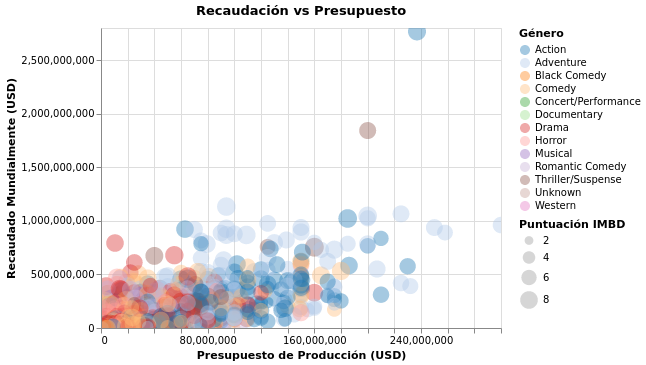

In [24]:
movies_chart()

### Ejercicio 2.3

Generar widgets para cada uno de los argumentos de la función `movies_chart`, los nombres sugeridos son:

- `year_widget` para el argumente `year`, debe ser un `widget.IntRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 1 unidad.
- `imdb_widget` para el argumente `imdb`, debe ser un `widget.FloatRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 0.1 unidad.
- `genre_widget` para el argumente `genre`, debe ser un `widget.SelectMultiple`, por defecto deben venir selecionados todos los géneros..
- `budget_widget` para el argumente `budget`, debe ser un `widget.IntRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 1 unidad.
- `ww_gross_widget` para el argumente `ww_gross`, debe ser un `widget.IntRangeSlider`, por defecto deben venir selecionados el mínimo y máximo; el paso debe ser de 1 unidad.

Todo widget debe tener un valor adecuado para el argumento `description` y configurar el argumento `continuous_update = False`.

In [25]:
year_widget = widgets.IntRangeSlider(
    value=(
        movies['Release_Date'].apply(lambda x: x.year).min(),
        movies['Release_Date'].apply(lambda x: x.year).max(),
    ),
    min=movies['Release_Date'].apply(lambda x: x.year).min(),
    max=movies['Release_Date'].apply(lambda x: x.year).max(),
    step=1,
    continuous_update = False,
    description='Año',
)

imdb_widget = widgets.FloatRangeSlider(
    value=(
        movies['IMDB_Rating'].min(),
        movies['IMDB_Rating'].max(),
    ),
    min=movies['IMDB_Rating'].min(),
    max=movies['IMDB_Rating'].max(),
    step=0.1,
    continous_update=False,
    description='Puntuación en IMDB',
)

genre_widget = widgets.SelectMultiple(
    value=list(movies['Major_Genre'].unique()),
    options=movies['Major_Genre'].unique(),
    continous_update=False,
    description='Género principal',
)

budget_widget = widgets.IntRangeSlider(
    value=(
        movies['Production_Budget'].min(),
        movies['Production_Budget'].max(),
    ),
    min=movies['Production_Budget'].min(),
    max=movies['Production_Budget'].max(),
    step=1,
    continous_update=False,
    description='Presupuesto de producción',
)

ww_gross_widget = widgets.IntRangeSlider(
    value=(
        movies['Worldwide_Gross'].min(),
        movies['Worldwide_Gross'].max(),
    ),
    min=movies['Worldwide_Gross'].min(),
    max=movies['Worldwide_Gross'].max(),
    step=1,
    continous_update=False,
    description='Recaudación mundial',
)

In [27]:
movies_dashboard = interactive(
    movies_chart,
    year=year_widget,
    imdb_rating=imdb_widget,
    genre=genre_widget,
    budget=budget_widget,
    ww_gross=ww_gross_widget
)
movies_dashboard

interactive(children=(IntRangeSlider(value=(1925, 2015), continuous_update=False, description='Año', max=2015,…